## 2. Ingestion & Initial Exploration

In [1]:
%pip install ucimlrepo

In [2]:
import numpy as np
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt


In [3]:


# 1. Fetch the dataset
bank_marketing = fetch_ucirepo(id=222)

# 2. Extract features (X) and target (y)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# 3. Build the DataFrame
df = pd.DataFrame(X, columns=bank_marketing.data.feature_names)
df['y'] = y

# 4. Inspect
print(df.head())
print(df.shape)   # rows × columns


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  
(45211, 17)


In [4]:
print(df.dtypes)

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object


In [5]:
df['day_of_week'] = df['day_of_week'].astype(str).astype('object')

In [6]:
df['day_of_week'].dtype

dtype('O')

In [7]:
# 2. Count of missing values per column
print(df.isnull().sum())


age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


- Only poutcome, contact, education, job columns having the missing values.
- poutcome has 80+ missing, so it better to drop
- contact made, has 25%+ KNN Imputers can be used for the missing,
- simiary for eductaion and job aswelll knn imputers are excel fit

In [8]:
# 3. Percent missing per column (optional)
pct_missing = df.isnull().mean() * 100
print(pct_missing.sort_values(ascending=False))

poutcome       81.747805
contact        28.798301
education       4.107407
job             0.637013
age             0.000000
default         0.000000
balance         0.000000
housing         0.000000
marital         0.000000
loan            0.000000
day_of_week     0.000000
duration        0.000000
month           0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
y               0.000000
dtype: float64


Matplotlib is building the font cache; this may take a moment.


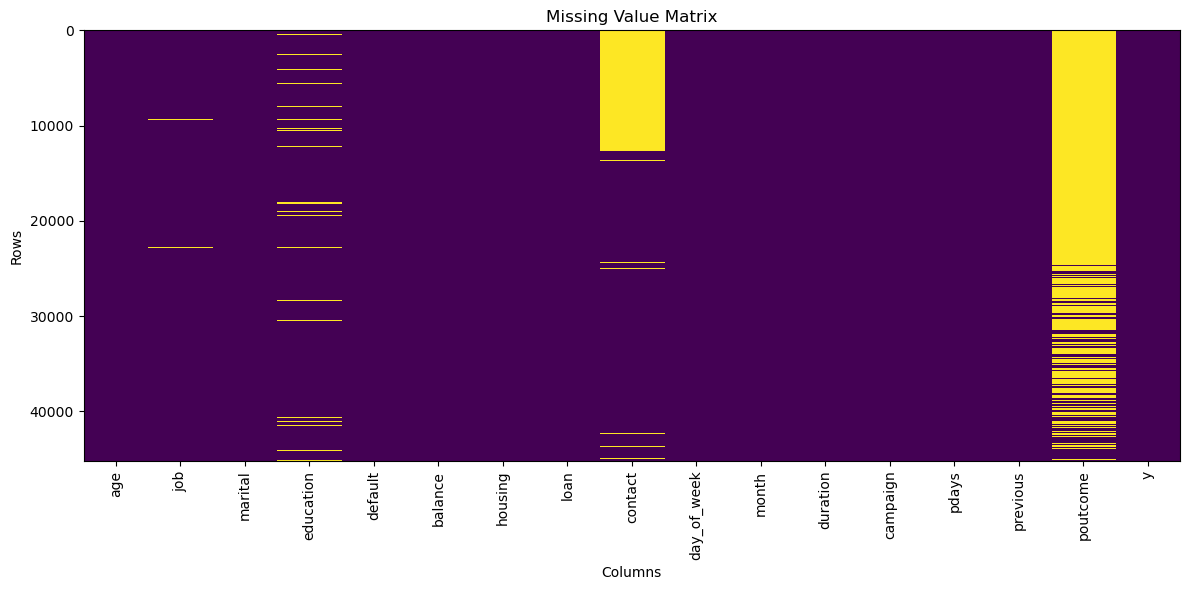

In [ ]:
# Create missing-value mask
mask = df.isnull()

plt.figure(figsize=(12, 6))
plt.imshow(mask.values, aspect='auto', interpolation='none')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.title('Missing Value Matrix')
plt.tight_layout()
plt.show()


- All numeric columns distribution

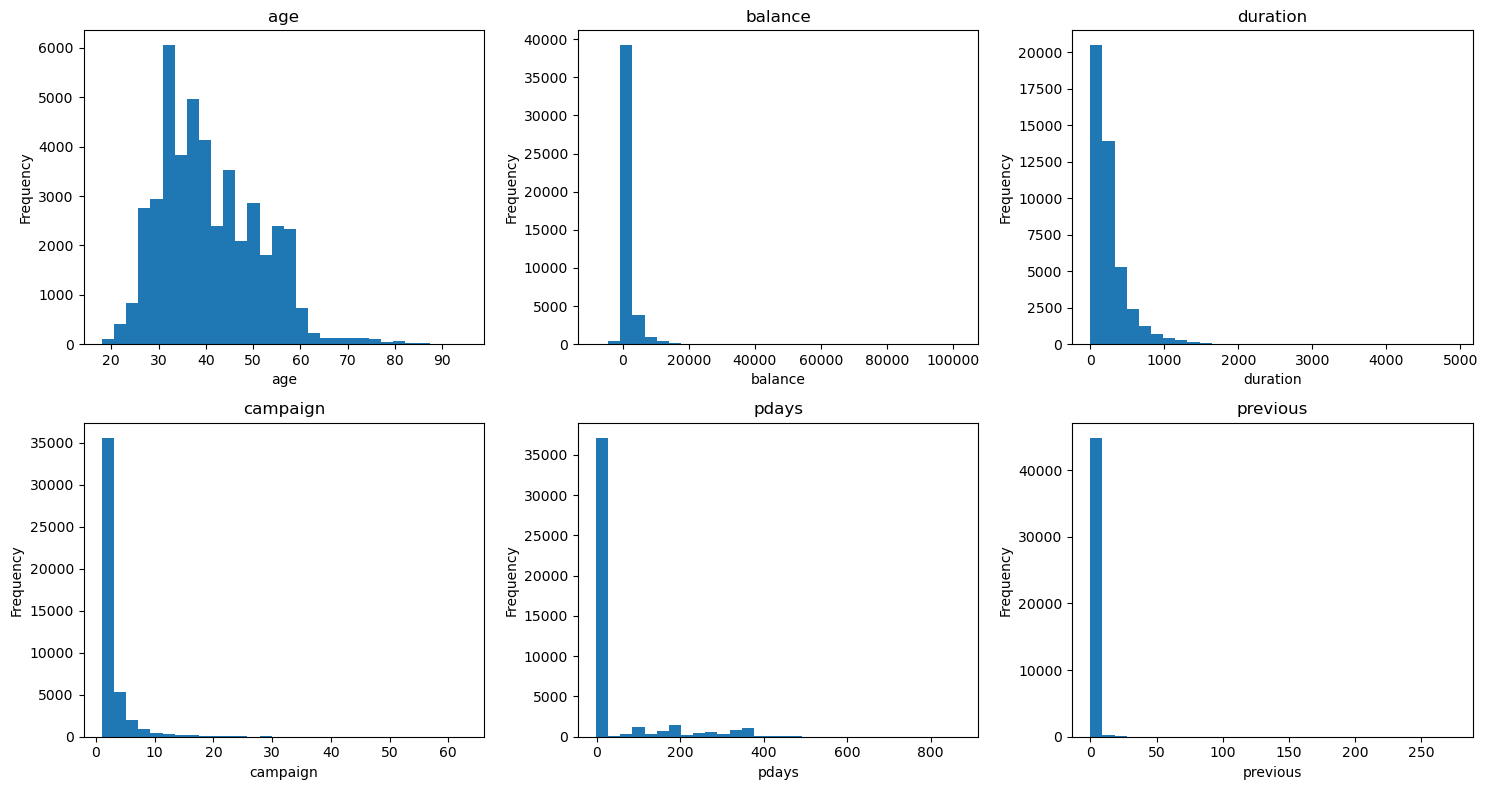

In [ ]:

# List of features to plot
features = [
    'age', 'balance', 'duration', 'campaign', 'pdays', 'previous'
]

# Grid layout parameters
n_cols = 3
n_plots = len(features)
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for ax, col in zip(axes, features):
    if pd.api.types.is_numeric_dtype(df[col]):
        # Numeric: histogram
        ax.hist(df[col].dropna(), bins=30)
        ax.set_ylabel('Frequency')
    else:
        # Categorical: bar plot of value counts
        counts = df[col].value_counts().sort_index()
        ax.bar(counts.index.astype(str), counts.values)
        ax.set_ylabel('Count')
        ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
    ax.set_title(col)
    ax.set_xlabel(col)

# Turn off any unused subplots
for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


C:\Users\Patil Shinde\AppData\Local\Temp\ipykernel_9144\2263966798.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
C:\Users\Patil Shinde\AppData\Local\Temp\ipykernel_9144\2263966798.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
C:\Users\Patil Shinde\AppData\Local\Temp\ipykernel_9144\2263966798.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
C:\Users\Patil Shinde\AppData\Local\Temp\ipykernel_9144\2263966798.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

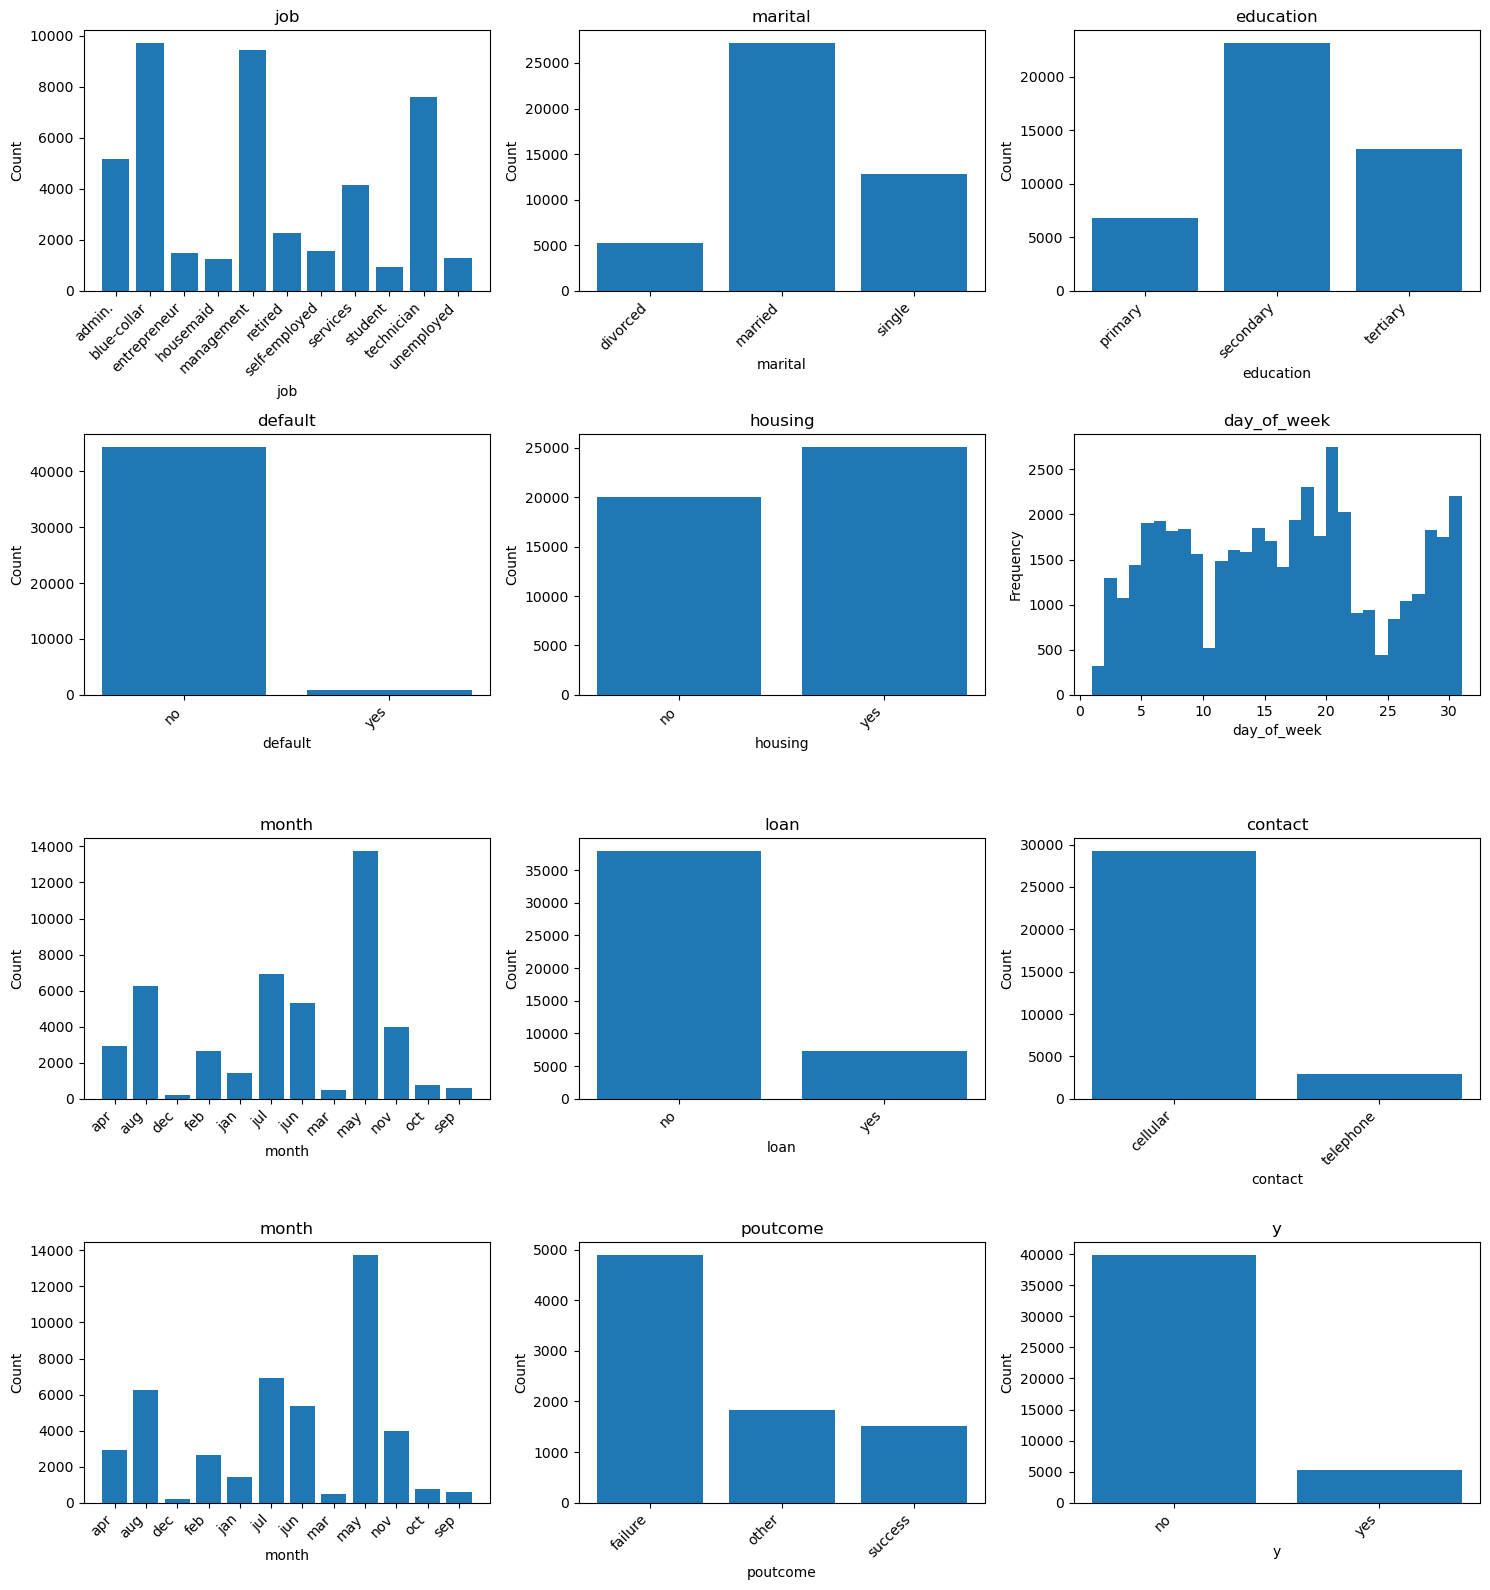

In [ ]:

features = [ 'job', 'marital', 'education', 'default', 'housing', 'day_of_week',
    'month', 'loan', 'contact', 'month', 'poutcome', 'y']

# Grid layout parameters
n_cols = 3
n_plots = len(features)
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for ax, col in zip(axes, features):
    if pd.api.types.is_numeric_dtype(df[col]):
        # Numeric: histogram
        ax.hist(df[col].dropna(), bins=30)
        ax.set_ylabel('Frequency')
    else:
        # Categorical: bar plot of value counts
        counts = df[col].value_counts().sort_index()
        ax.bar(counts.index.astype(str), counts.values)
        ax.set_ylabel('Count')
        ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
    ax.set_title(col)
    ax.set_xlabel(col)

# Turn off any unused subplots
for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


- **Correlation Matrix:** previous and pdays are moderately correlated with 0.45, rest of theumeric features shows hardly any correlaion

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000


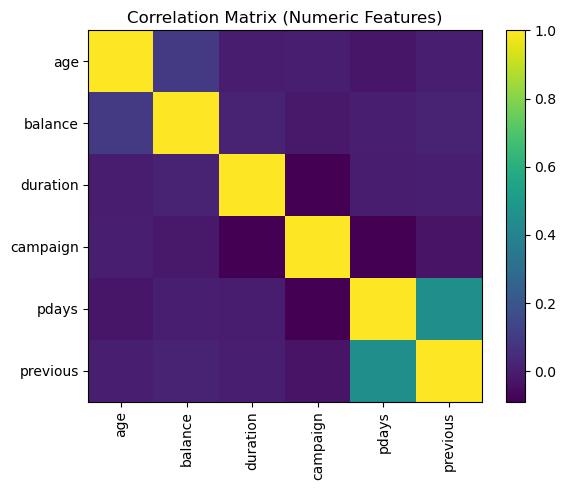

In [ ]:

numeric_cols = [
    'age', 'balance', 'duration', 'campaign', 'pdays', 'previous'
]

# 2. Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# 3. Display as a table
print(corr_matrix)

# 4. Optional: simple heatmap with matplotlib
plt.figure(figsize=(6,5))
plt.imshow(corr_matrix, aspect='auto', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix (Numeric Features)')
plt.tight_layout()
plt.show()


## 3. Data Cleaning & Preprocessing

**3.1 Handle Missing Values**
- **poutcome**: Filled all `NaN` with `"nonexistent"` to preserve “never contacted” as its own category.
- **contact**: Imputed missing entries with `"unknown"` so “no contact type” is modeled as a separate category.
- **education**: Used `SimpleImputer(strategy='most_frequent', fill_value='unknown')` to replace \~4% missing with the mode and cast to categorical.
- **job**: Applied `SimpleImputer(strategy='most_frequent', fill_value='unknown')` to fill <1% missing with the most common occupation and cast to categorical.


In [9]:
df['poutcome'] = df['poutcome'].fillna('nonexistent').astype('category')

In [10]:
df['contact'] = df['contact'].fillna('unknown').astype('category')

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent', fill_value='unknown')
df['education'] = imp.fit_transform(df[['education']]).ravel()
df['education'] = df['education'].astype('category')

In [12]:
imp = SimpleImputer(strategy='most_frequent', fill_value='unknown')
df['job'] = imp.fit_transform(df[['job']]).ravel()
df['job'] = df['job'].astype('category')


**3.2 Outlier Detection & Treatment**

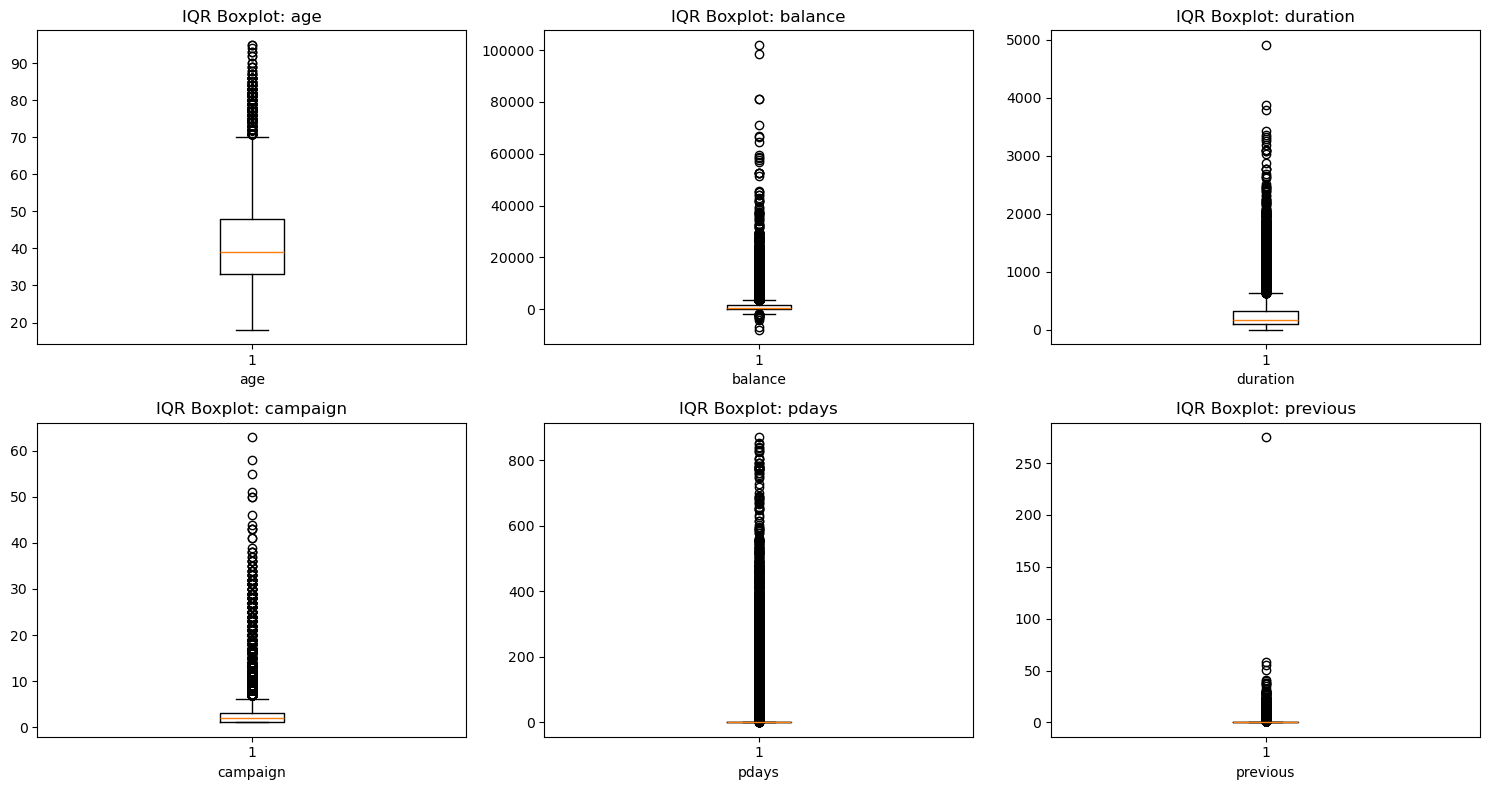

In [ ]:
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Set up 2x3 grid for side-by-side boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    # Boxplot displays median, Q1, Q3, and whiskers at 1.5*IQR
    ax.boxplot(df[col].dropna(), vert=True)
    ax.set_title(f'IQR Boxplot: {col}')
    ax.set_xlabel(col)

# Remove any unused axes (if any)
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

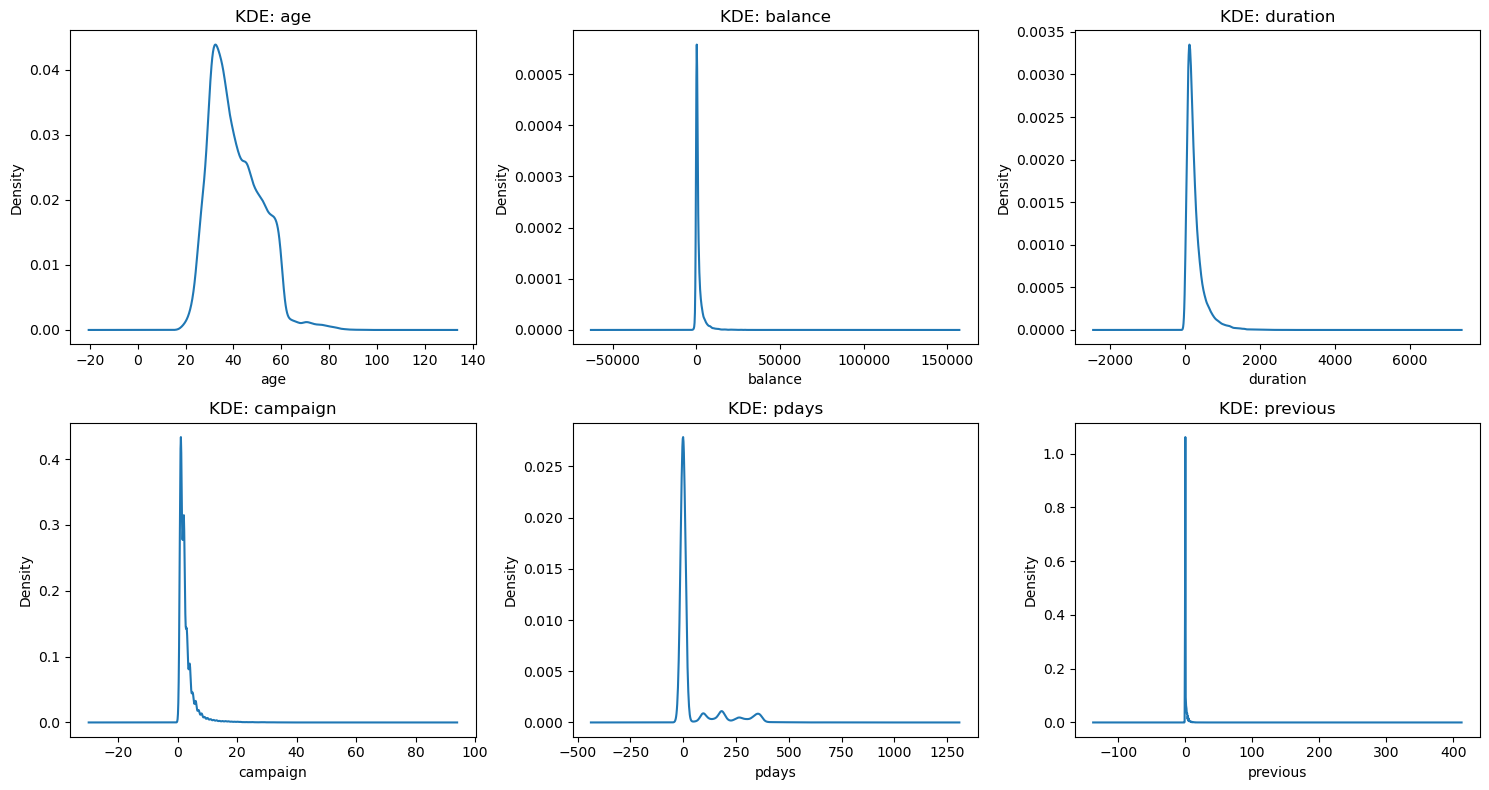

In [ ]:

# List of columns to plot
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create a 2×3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot a KDE on each axes
for ax, col in zip(axes, numeric_cols):
    # pandas will use matplotlib under the hood
    df[col].dropna().plot.kde(ax=ax)
    ax.set_title(f'KDE: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

# If there are any unused subplots, remove them
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


# 4.Feature Transfromation

**Numeric Fetaures:**
- I have applied a log1p transform to the six skewed numeric features (age, balance, duration, campaign, pdays, previous) to compress their heavy‐tailed distributions.
- This ensures that extreme values no longer dominate the Euclidean distances in K-means, yielding more balanced, stable clusters.

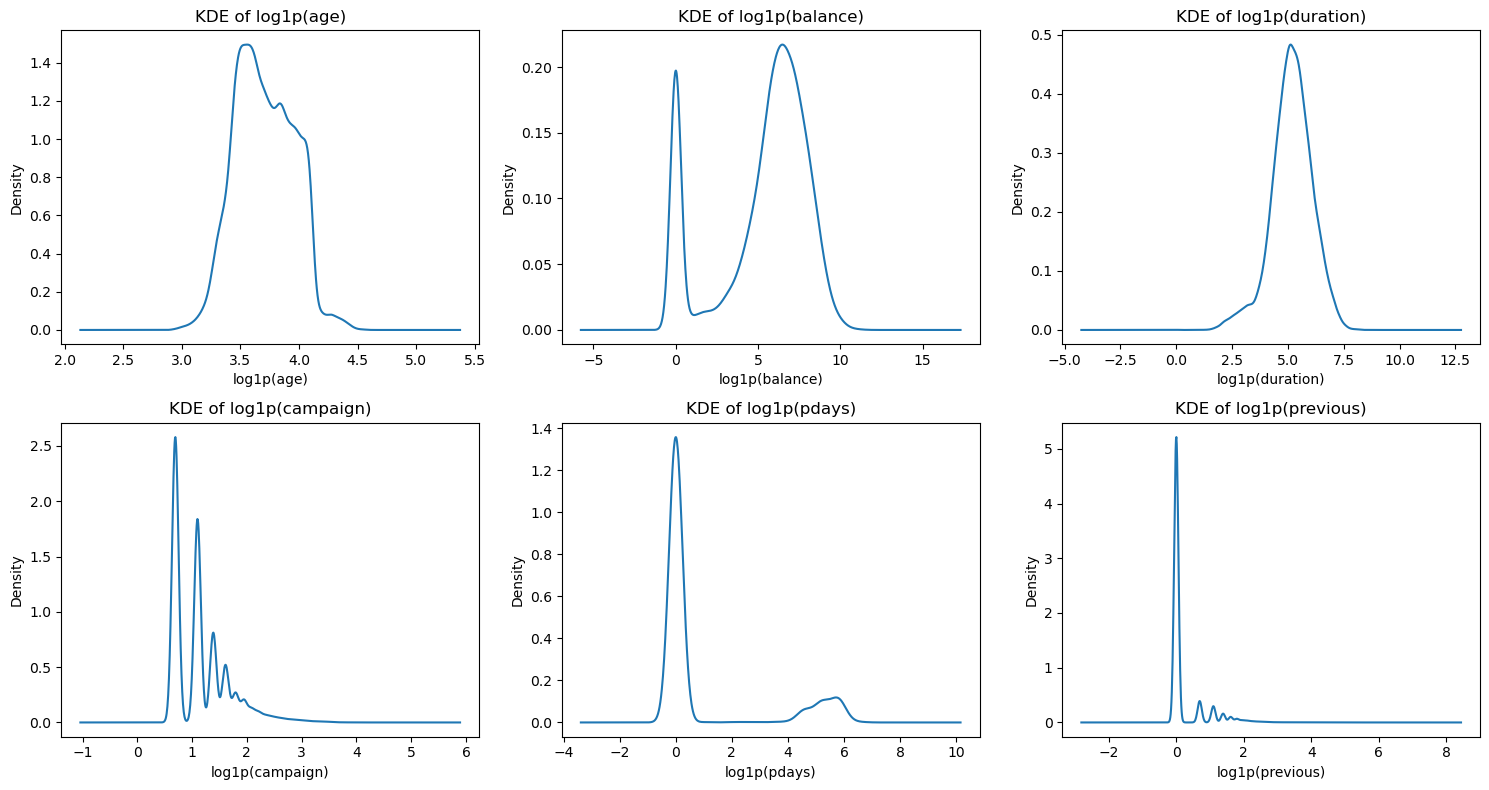

In [ ]:


# Original numeric columns
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create 2×3 grid for KDEs
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    # 1) Clip negatives (e.g. pdays=-1) up to 0, then log1p
    data = np.log1p(df[col].clip(lower=0))

    # 2) Plot KDE
    pd.Series(data).plot.kde(ax=ax)

    ax.set_title(f'KDE of log1p({col})')
    ax.set_xlabel(f'log1p({col})')
    ax.set_ylabel('Density')

# Remove any extra empty subplots
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [14]:
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

df[numeric_cols] = df[numeric_cols]\
    .clip(lower=0) \
    .apply(np.log1p)

print(df[numeric_cols].head())

        age   balance  duration  campaign  pdays  previous
0  4.077537  7.670429  5.568345  0.693147    0.0       0.0
1  3.806662  3.401197  5.023881  0.693147    0.0       0.0
2  3.526361  1.098612  4.343805  0.693147    0.0       0.0
3  3.871201  7.317876  4.532599  0.693147    0.0       0.0
4  3.526361  0.693147  5.293305  0.693147    0.0       0.0


**Categoric Features Encoding:**
* **Binary mapping for simple flags**: Converted `default`, `housing` and `loan` from “yes”/“no” into 0/1 so they stay numeric and don’t bloat the feature space.
* **One-hot encoding for low-cardinality noms**: Expanded `marital`, `poutcome` (and `contact` if keeping “unknown”) into dummy columns to represent each category without implying any order.
* **Specialized transforms for the rest**:

  * **`job`** → frequency-encoded to one numeric feature capturing rarity,
  * **`education`** → ordinal-encoded (plus an “unknown” flag) to preserve its hierarchy,
  * **`day_of_week`/`month`** → sinusoidal (sin/cos) to respect their cyclic nature.


In [14]:
df1 = df.copy()

In [ ]:
df[['default','housing','loan','contact']].head(10)

,default,housing,loan,contact
0,no,yes,no,unknown
1,no,yes,no,unknown
2,no,yes,yes,unknown
3,no,yes,no,unknown
4,no,no,no,unknown
5,no,yes,no,unknown
6,no,yes,yes,unknown
7,yes,yes,no,unknown
8,no,yes,no,unknown
9,no,yes,no,unknown


In [15]:
# 1) Binary encodings
bin_map = {'yes':1, 'no':0}
df1[['default','housing','loan']] = df1[['default','housing','loan']].replace(bin_map)

# Contact: binary vs. one-hot
df1['contact_bin'] = df1['contact'].map({'cellular':0,'telephone':1,'unknown':2})


<ipython-input-15-1f3dced68564>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[['default','housing','loan']] = df1[['default','housing','loan']].replace(bin_map)


In [16]:
# 2) One-hot for marital & poutcome
df1 = pd.get_dummies(df1,
    columns=['marital','poutcome'],
    drop_first=True)  # avoids dummy trap

In [17]:
# 3) Frequency encoding for job
job_freq = df1['job'].value_counts(normalize=True)
df1['job_freq'] = df1['job'].map(job_freq)

In [18]:
# 4) Ordinal encoding for education
edu_map = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2,
}
df1['education_ord'] = df1['education'].map(edu_map)

In [19]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df1['month'] = df1['month'].str.lower().map(month_map)

df1['y'] = df1['y'].map({'yes': 1, 'no': 0})

bool_cols = [
    'marital_married', 'marital_single',
    'poutcome_nonexistent', 'poutcome_success', 'poutcome_other'
]
df1[bool_cols] = df1[bool_cols].astype(int)

In [20]:
df1.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'contact_bin', 'marital_married', 'marital_single',
       'poutcome_nonexistent', 'poutcome_other', 'poutcome_success',
       'job_freq', 'education_ord'],
      dtype='object')

In [21]:
df[['job', 'education', 'contact']].head()

,job,education,contact
0,management,tertiary,unknown
1,technician,secondary,unknown
2,entrepreneur,secondary,unknown
3,blue-collar,secondary,unknown
4,blue-collar,secondary,unknown


In [22]:
# 5) Drop raw columns we’ve replaced
df1.drop([
    'job', 'education', 'contact'
], axis=1, inplace=True)

In [23]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

print(df1.head())


   age  default  balance  housing  loan day_of_week  month  duration  campaign  pdays  previous  y contact_bin  marital_married  marital_single  poutcome_nonexistent  poutcome_other  poutcome_success  job_freq education_ord
0   58        0     2143        1     0           5      5       261         1     -1         0  0           2                1               0                     1               0                 0  0.209197             2
1   44        0       29        1     0           5      5       151         1     -1         0  0           2                0               1                     1               0                 0  0.168034             1
2   33        0        2        1     1           5      5        76         1     -1         0  0           2                1               0                     1               0                 0  0.032890             1
3   47        0     1506        1     0           5      5        92         1     -1         0  0      

In [33]:
# In Notebook A: mount and save
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
# Notebook A
df1.to_pickle('/content/drive/MyDrive/df1.pkl')


In [27]:
df.head(100).to_csv('sample_raw.csv', index=False)
df1.head(100).to_csv('sample_processed.csv', index=False)
X_scaled.head(100).to_csv('sample_scaled.csv', index=False)
